In [1]:
#Data cleaning
import pandas as pd
df = pd.read_csv(r"C:\Users\iswar\Downloads\1717428188_hr_comma_sep\HR_comma_sep.csv")
print(df.describe())
print(df.shape)
print(df.head(5))

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

In [2]:
print(df.sales.unique())
print(df.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [3]:
null_values = ["na", "N//A", "NAN", "n a", 'NA']
df = df.replace(null_values, pd.NA)
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [4]:
#Duplicate Row findings
duplicated_part = df[df.duplicated(keep=False)]
print(duplicated_part.shape)

#Duplicate Column findings:

#initializing an empty dictionary
column_counts = {}

for column in df.columns:
    if column in column_counts:
        column_counts[column]+=1
    else: 
        column_counts[column]=1

duplicate_list = [column for column, counts in column_counts.items() if counts >1]

if duplicate_list:
    print(duplicate_list)
else:
    print("No duplicate value present in the columns")

(5346, 10)
No duplicate value present in the columns


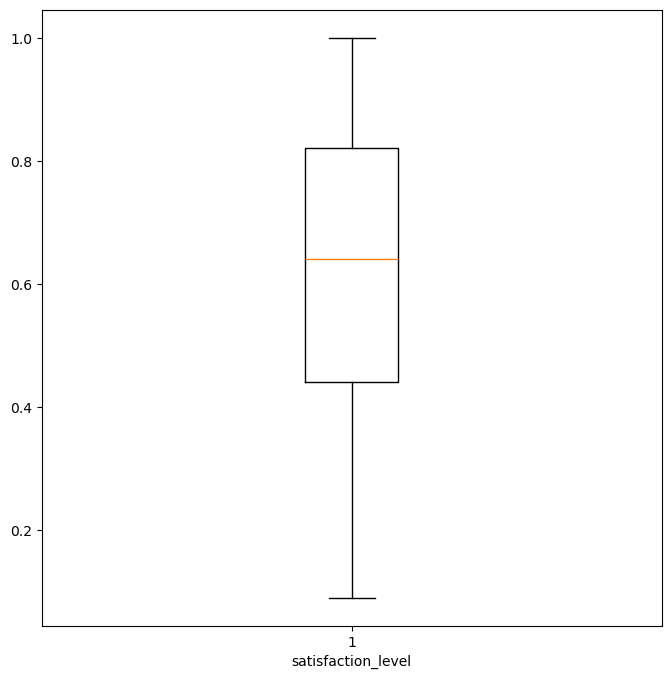

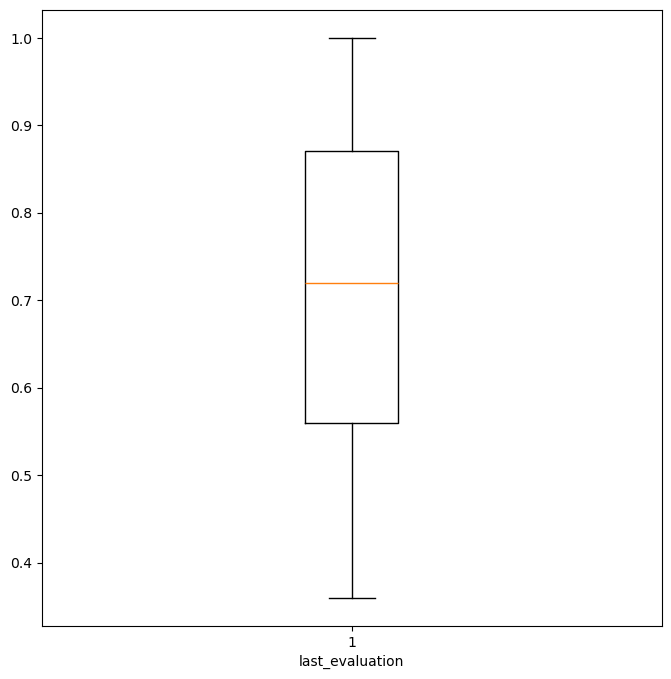

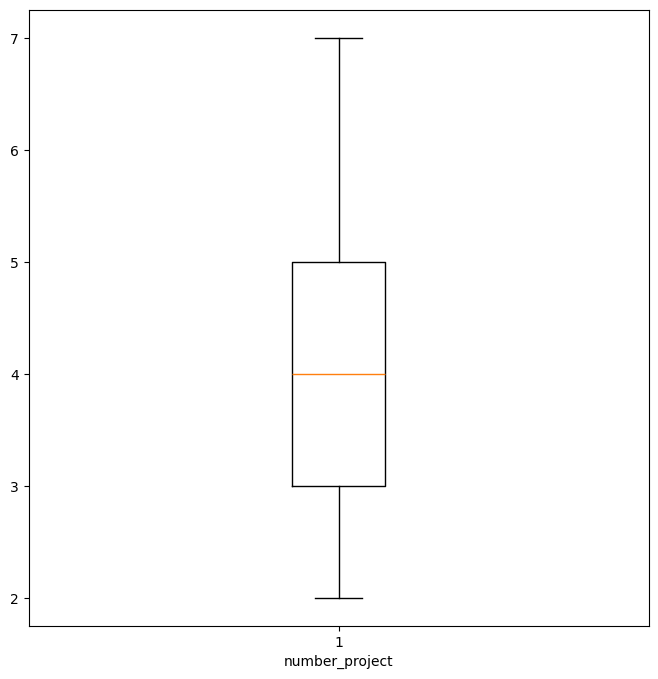

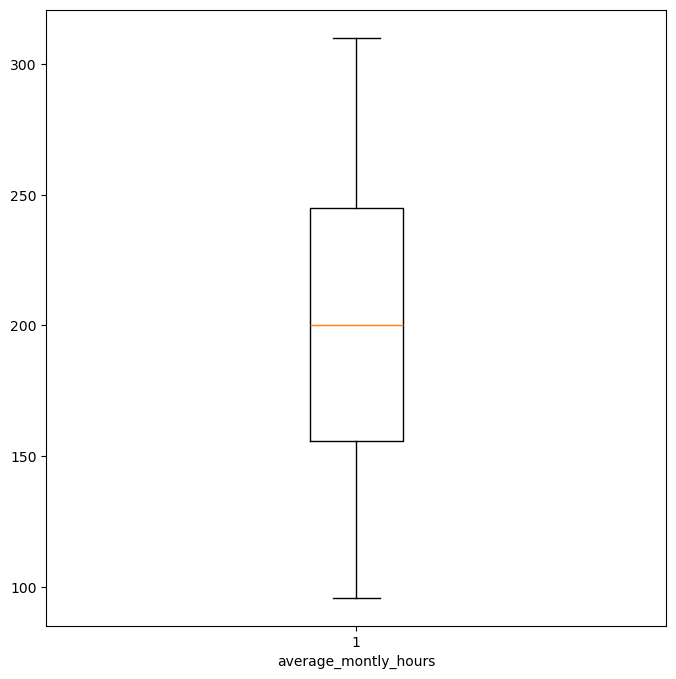

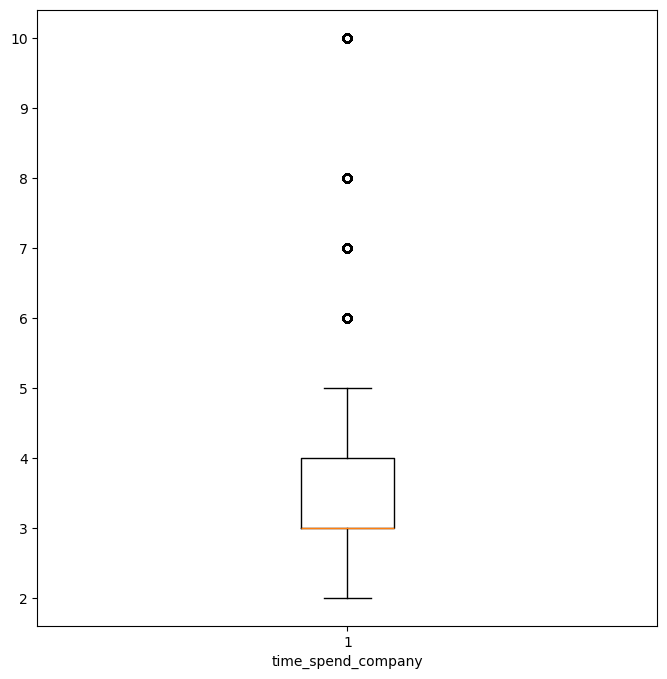

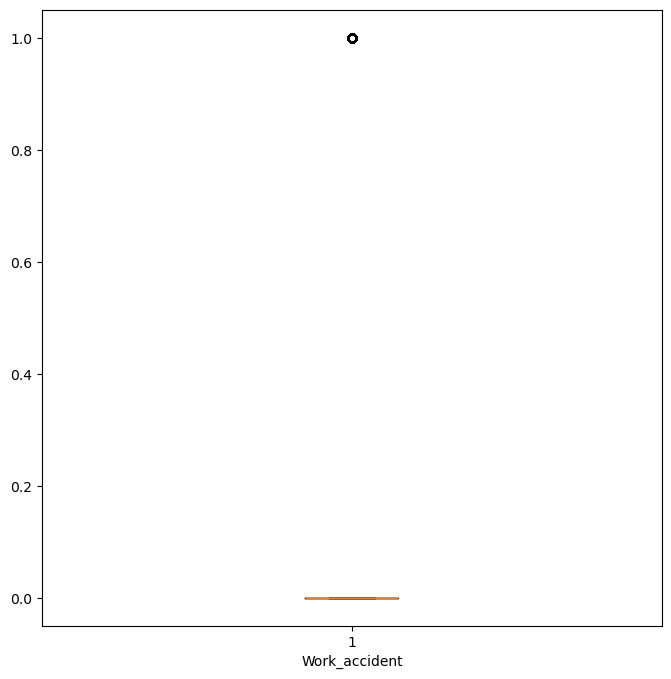

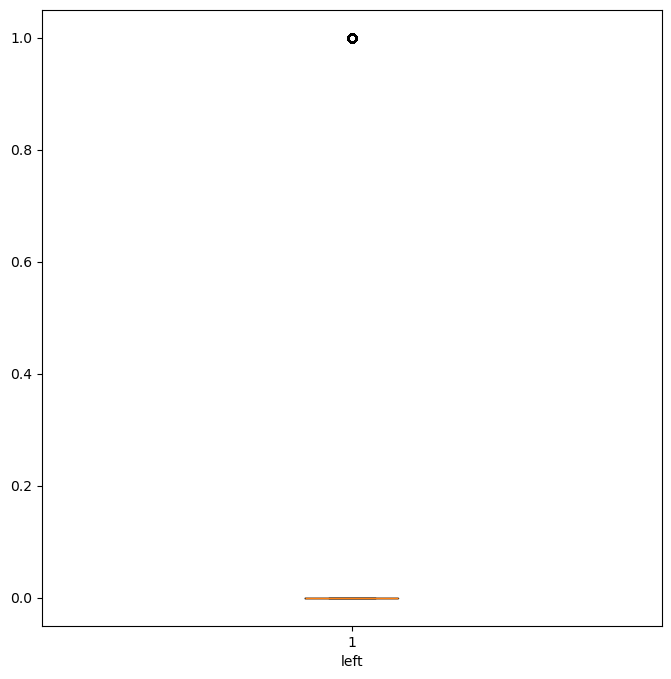

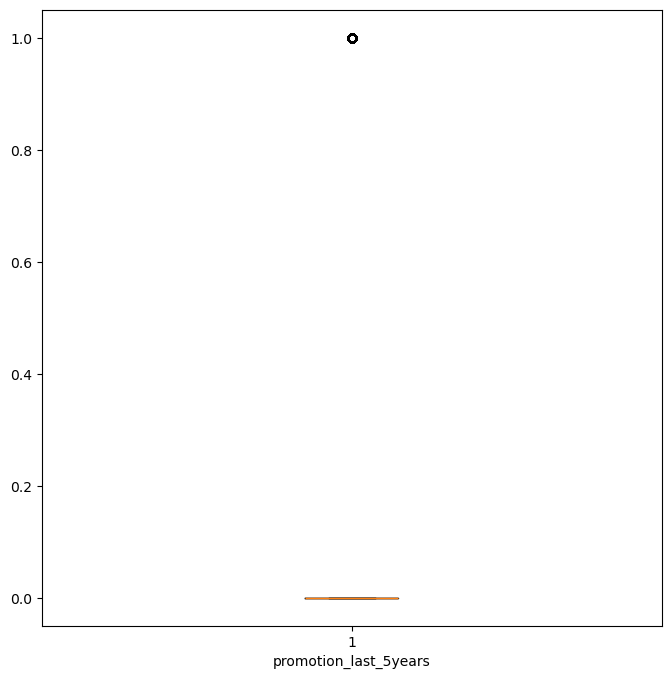

In [5]:
#outlier findings
import matplotlib.pyplot as plt
numeric_columns = df.select_dtypes(include=['number'])
for i in numeric_columns:
    plt.figure(figsize=(8,8))
    plt.boxplot(df[i])
    plt.xlabel(i)

#inference from the boxplot
Upon looking into the box plot, there is no serious outlier issue associated with the above columns.

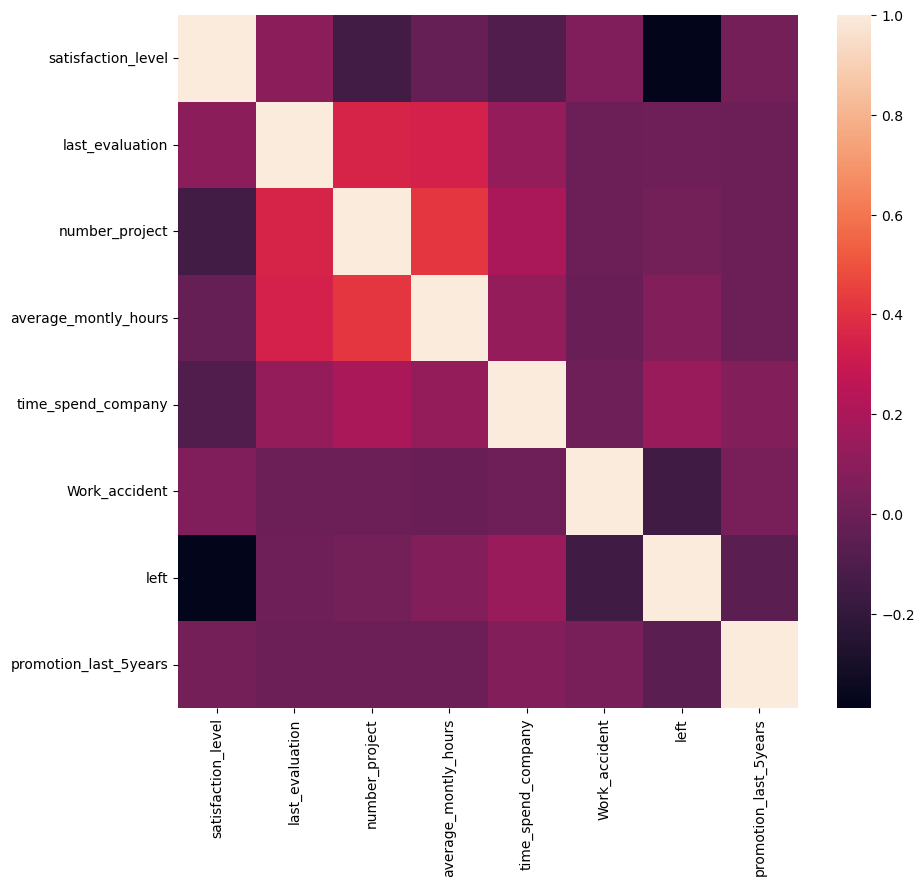

In [6]:
#2.1.	Draw a heatmap of the correlation matrix between all numerical features or columns in the data.
import seaborn as sns
numeric_columns_df = pd.DataFrame(numeric_columns)
correlation_matrx = numeric_columns_df.corr()
plt.figure(figsize=(10,9))
sns.heatmap(correlation_matrx)
plt.show()

C:\Users\iswar\AppData\Local\Temp\ipykernel_11156\3573408316.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


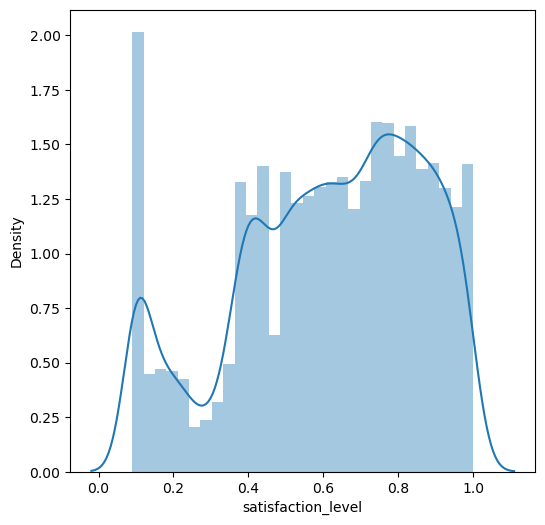

C:\Users\iswar\AppData\Local\Temp\ipykernel_11156\3573408316.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


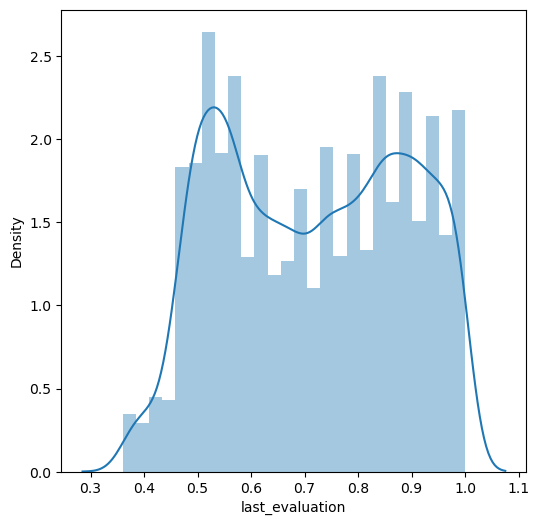

C:\Users\iswar\AppData\Local\Temp\ipykernel_11156\3573408316.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


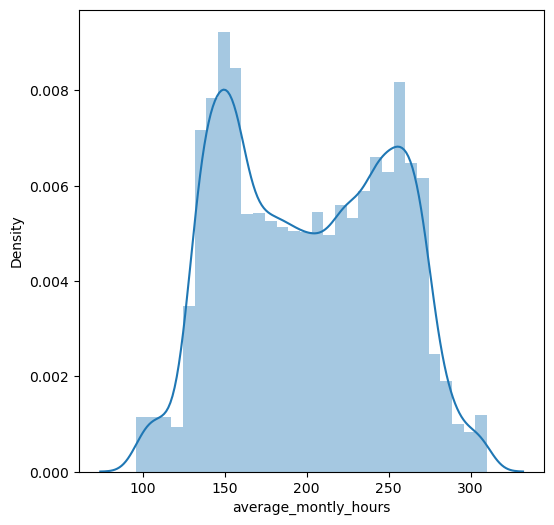

In [7]:
# 2.2.	Draw the distribution plot of:
# ■	Employee Satisfaction (use column satisfaction_level)
# ■	Employee Evaluation (use column last_evaluation)
# ■	Employee Average Monthly Hours (use column average_montly_hours)

dist_columns = ['satisfaction_level','last_evaluation', 'average_montly_hours']
for i in dist_columns:
    plt.figure(figsize=(6,6))
    sns.distplot(df[i])
    plt.show()

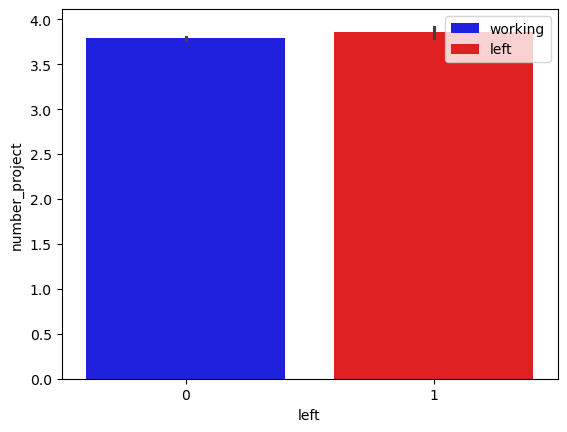

In [8]:
# 2.3.	Draw the bar plot of the employee project count of both employees who left and stayed in the organization 
#use column number_project and hue column left), and give your inferences from the plot.
sns.barplot(x='left', y= 'number_project', data =df, hue=df['left'], palette={0: 'blue', 1: 'red'})
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles,labels = ['working', 'left'])
plt.show()

In [9]:
# 3.	Perform clustering of employees who left based on their satisfaction and evaluation.
# 3.1.	Choose columns satisfaction_level, last_evaluation, and left.
# 3.2.	Do K-means clustering of employees who left the company into 3 clusters?
# 3.3.	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters

#I am splitting the df with values left -==1, since clustering the left employee with satisfaction_level, and last_evaluation
from sklearn.cluster import KMeans 
import numpy as np
clustering_df = df[df['left']==1]
new_clustering_df = clustering_df[['satisfaction_level', 'last_evaluation', 'left']]
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(new_clustering_df)
clusters = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)
cluster_sizes = np.bincount(kmeans.labels_)
print(cluster_sizes)

[[0.41014545 0.51698182 1.        ]
 [0.80851586 0.91170931 1.        ]
 [0.11115466 0.86930085 1.        ]]
[1650  977  944]


My thoughts
Cluster 1:Employees with moderate satisfaction_level has moderate last_evaluation -- this group has 1650 employees
cluster_2: employees with High satisfaction level has high last_evaluation - this group has 977 employees
cluster_3: employees with very low satisfaction level has also secured high last_evaluation scores-- this group has 944 employees

Based on the interpretation, cluster 1 has moderate_satisfaction level and moderate_last_evaluation has left the company in more numbers.

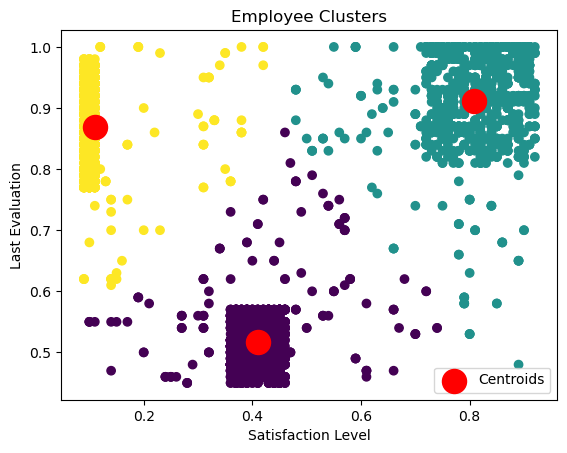

In [10]:
plt.scatter(new_clustering_df['satisfaction_level'], new_clustering_df['last_evaluation'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Employee Clusters')
plt.legend()
plt.show()

In [11]:
left = df['left'].value_counts()
print(left)

left
0    11428
1     3571
Name: count, dtype: int64


Due to less number of 1(3571), we are having imbalanced data in the employees who left the company. so we need to balanve the data with different techniques.

In [12]:
# using SMOTE technique
# for that we need to first make sure all columns in the df are numerical values. here we have 2 categorical columns. need to convert this. ordinal data is available in salary and nominal data available in sales. so need to work on two different techniques
numerical_columns = df.select_dtypes(include = ['number']).columns
Categorical_columns = df.select_dtypes(include =['category','object']).columns
df_numerical = df[numerical_columns]
df_Categorical = df[Categorical_columns]
print(df_numerical)
print(df_Categorical)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_values = encoder.fit_transform(df_Categorical['salary'])
encoded_values_sales = encoder.fit_transform(df_Categorical['sales'])
encoded_df=pd.DataFrame()
encoded_df['encoded_salary'] = encoded_values
encoded_df_values_sales=pd.DataFrame()
encoded_df_values_sales['encoded_sales']= encoded_values_sales
print(encoded_df.head(10))
encoded_df_values_sales.head(10)

   encoded_salary
0               1
1               2
2               2
3               1
4               1
5               1
6               1
7               1
8               1
9               1


,encoded_sales
0,7
1,7
2,7
3,7
4,7
5,7
6,7
7,7
8,7
9,7


In [17]:
before_normalization_df = pd.concat([encoded_df, encoded_df_values_sales, df_numerical],axis=1)
print(before_normalization_df.columns)
before_normalization_df.columns = ['col1','encoded_salary','Col3','encoded_sales','satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident', 'left', 'promotion_last_5years']
before_normalization_df.drop(columns=['col1','Col3'],inplace=True)
print(before_normalization_df.columns)
before_normalization_df.describe()

Index(['encoded_salary', 'encoded_sales', 'satisfaction_level',
       'last_evaluation', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years'],
      dtype='object')


ValueError: Length mismatch: Expected axis has 10 elements, new values have 12 elements

In [18]:
before_normalization_df

,encoded_salary,encoded_sales,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,1,7,0.38,0.53,2,157,3,0,1,0
1,2,7,0.80,0.86,5,262,6,0,1,0
2,2,7,0.11,0.88,7,272,4,0,1,0
3,1,7,0.72,0.87,5,223,5,0,1,0
4,1,7,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...
14994,1,8,0.40,0.57,2,151,3,0,1,0
14995,1,8,0.37,0.48,2,160,3,0,1,0
14996,1,8,0.37,0.53,2,143,3,0,1,0
14997,1,8,0.11,0.96,6,280,4,0,1,0


In [19]:
#normalzing columns which are not in the range of 0 t0 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_normalize = before_normalization_df[['encoded_salary','encoded_sales','number_project','average_montly_hours','time_spend_company']]
before_normalization_df[['encoded_salary','encoded_sales','number_project','average_montly_hours','time_spend_company']] = scaler.fit_transform(columns_to_normalize)
print(before_normalization_df)

       encoded_salary  encoded_sales  satisfaction_level  last_evaluation  \
0                 0.5       0.777778                0.38             0.53   
1                 1.0       0.777778                0.80             0.86   
2                 1.0       0.777778                0.11             0.88   
3                 0.5       0.777778                0.72             0.87   
4                 0.5       0.777778                0.37             0.52   
...               ...            ...                 ...              ...   
14994             0.5       0.888889                0.40             0.57   
14995             0.5       0.888889                0.37             0.48   
14996             0.5       0.888889                0.37             0.53   
14997             0.5       0.888889                0.11             0.96   
14998             0.5       0.888889                0.37             0.52   

       number_project  average_montly_hours  time_spend_company  \
0       

In [20]:
from sklearn.model_selection import train_test_split
target_variable = before_normalization_df['left']
y = target_variable
x = before_normalization_df.drop(columns='left')
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=143)
print(f'training_data_features',x_train)
print(f'test_data_features', x_test)
print(f'training_data_target',y_train)
print(f'test_data_target', y_test)


training_data_features        encoded_salary  encoded_sales  satisfaction_level  last_evaluation  \
2483              1.0       1.000000                0.94             0.78   
12856             0.5       1.000000                0.78             0.52   
6704              0.5       0.000000                0.51             0.99   
14427             0.5       0.000000                0.36             0.48   
14386             0.5       0.777778                0.54             0.74   
...               ...            ...                 ...              ...   
162               0.5       0.777778                0.45             0.51   
8737              1.0       1.000000                0.74             0.87   
1553              1.0       0.777778                0.82             0.82   
2201              0.5       0.000000                0.17             0.59   
590               0.5       0.888889                0.38             0.55   

       number_project  average_montly_hours  time_sp

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train,y_train)
print(x_train_resampled.shape)
print(y_train_resampled.shape)

(18284, 9)
(18284,)


In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(x_train_resampled, y_train_resampled)

LogisticRegression(max_iter=200)